In [3]:
!pip install gensim --upgrade --no-cache-dir

In [4]:
!pip uninstall -y numpy
!pip install numpy==1.24.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
blosc2 3.7.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
pywavelets 1.9.0 requires numpy<3,>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.10 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.3 requires numpy>=1.25, but you have numpy 1

In [1]:
from gensim import downloader

In [2]:
import numpy as np
import sklearn.linear_model
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os
from sklearn.linear_model import RidgeCV
from scipy.spatial.distance import cdist

# Task 1: Sentence decoding


**Part 1**

Reproduce task 3 from pset3 with another word embedding

In [3]:
# download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-08-16 05:31:19--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.219.132, 2607:f8b0:400c:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.219.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M   111MB/s    in 0.8s    

2025-08-16 05:31:21 (111 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        


In [15]:
cat learn_decoder.py

#!/usr/bin/env python
""" learn_decoder """
import sys

import numpy as np
import sklearn.linear_model

def read_matrix(filename, sep=","):
    lines = []
    with open(filename) as infile:
        for line in infile:
            lines.append(list(map(float, line.strip().split(sep))))
    return np.array(lines)

data = read_matrix("imaging_data.csv", sep=",")
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")

def learn_decoder(data, vectors):
     """ Given data (a CxV matrix of V voxel activations per C concepts)
     and vectors (a CxD matrix of D semantic dimensions per C concepts)
     find a matrix M such that the dot product of M and a V-dimensional 
     data vector gives a D-dimensional decoded semantic vector. 

     The matrix M is learned using ridge regression:
     https://en.wikipedia.org/wiki/Tikhonov_regularization
     """
     ridge = sklearn.linear_model.RidgeCV(
         alphas=[1, 10, .01, 100, .001, 1000, .0001, 10000, .00001, 100000, .000001, 100

In [4]:
# load the concepts
with open("stimuli_180concepts.txt", "r") as f:
    concepts = [line.strip() for line in f if line.strip()]
print(f"Loaded {len(concepts)} concepts.")

Loaded 180 concepts.


In [5]:
# load the FastText model
print("Loading FastText model (~1GB, may take 1–2 minutes)...")
fasttext = downloader.load("fasttext-wiki-news-subwords-300")
print("FastText model loaded.")

Loading FastText model (~1GB, may take 1–2 minutes)...
[==================================================] 100.0% 958.5/958.4MB downloaded
FastText model loaded.


In [6]:
# construct the concepts vectors into the matrix
vector_dim = 300
vectors = []
missing = []

for word in concepts:
    if word in fasttext:
        vectors.append(fasttext[word])
    else:
        print(f"Missing word: {word}")
        vectors.append(np.zeros(vector_dim))  # unlikely with FastText
        missing.append(word)

vectors = np.stack(vectors)
print("Matrix shape:", vectors.shape)

# save as space-separated text file (like GloVe format)
output_path = "vectors_180concepts_fasttext.txt"
np.savetxt(output_path, vectors, fmt="%.6f", delimiter=" ")

print(f"Saved FastText matrix to {output_path}")

Matrix shape: (180, 300)
Saved FastText matrix to vectors_180concepts_fasttext.txt


In [7]:
# decoder for fastextvectors
def read_matrix(filename, sep=","):
    lines = []
    with open(filename) as infile:
        for line in infile:
            values = [v for v in line.strip().split(sep) if v]  # skip empty strings
            lines.append(list(map(float, values)))
    return np.array(lines)

def learn_decoder_fast(data, vectors):
    """ Given data (a C×V matrix of V voxel activations per C concepts)
    and vectors (a C×D matrix of D semantic dimensions per C concepts),
    find a matrix M such that the dot product of M and a V-dimensional
    data vector gives a D-dimensional decoded semantic vector.

    The matrix M is learned using ridge regression:
    https://en.wikipedia.org/wiki/Tikhonov_regularization
    """
    ridge = sklearn.linear_model.RidgeCV(
        alphas=[1, 10, .01, 100, .001, 1000, .0001, 10000, .00001, 100000, .000001, 1000000],
        fit_intercept=False
    )
    ridge.fit(data, vectors)
    return ridge.coef_.T

In [8]:
# cross Validation with FastText decoder
def compute_average_rank(decoded_vectors, true_vectors, test_indices):
    ranks = []
    all_similarities = cosine_similarity(decoded_vectors, true_vectors)  # shape: (10, 180)

    for i, true_idx in enumerate(test_indices):
        similarities = all_similarities[i]
        sorted_indices = np.argsort(-similarities)  # descending sort
        rank = np.where(sorted_indices == true_idx)[0][0] + 1  # 1-based rank
        ranks.append(rank)

    return ranks, np.mean(ranks)

def cross_validation_accuracy_ft(data, vectors, k=18):
    n_concepts = data.shape[0]
    fold_size = n_concepts // k

    all_average_ranks = []
    all_ranks_per_fold = []

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(n_concepts)) - set(test_indices))

        data_train = data[train_indices]
        vectors_train = vectors[train_indices]
        data_test = data[test_indices]

        # learn decoder on training data
        decoder = learn_decoder_fast(data_train, vectors_train)

        # decode test data
        decoded_vectors = data_test @ decoder  # shape: (10, 300)

        # evaluate using full vectors and test_indices
        ranks, avg_rank = compute_average_rank(decoded_vectors, vectors, test_indices)

        all_average_ranks.append(avg_rank)
        all_ranks_per_fold.append(ranks)

        print(f"Fold {i+1}/{k}: Average rank = {avg_rank:.2f}")

    print(f"\nOverall average rank across {k} folds: {np.mean(all_average_ranks):.2f}")
    return all_ranks_per_fold, all_average_ranks

In [9]:
data = read_matrix("imaging_data.csv", sep=",")
vectors_fast = read_matrix("vectors_180concepts_fasttext.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) # the names of the 180 concepts

In [10]:
ranks_per_fold, avg_ranks = cross_validation_accuracy_ft(data, vectors_fast, k=18)

Fold 1/18: Average rank = 56.10
Fold 2/18: Average rank = 69.20
Fold 3/18: Average rank = 58.40
Fold 4/18: Average rank = 64.60
Fold 5/18: Average rank = 62.30
Fold 6/18: Average rank = 54.40
Fold 7/18: Average rank = 76.10
Fold 8/18: Average rank = 39.60
Fold 9/18: Average rank = 80.50
Fold 10/18: Average rank = 47.10
Fold 11/18: Average rank = 47.40
Fold 12/18: Average rank = 50.70
Fold 13/18: Average rank = 35.30
Fold 14/18: Average rank = 61.40
Fold 15/18: Average rank = 38.40
Fold 16/18: Average rank = 60.30
Fold 17/18: Average rank = 49.00
Fold 18/18: Average rank = 53.00

Overall average rank across 18 folds: 55.77


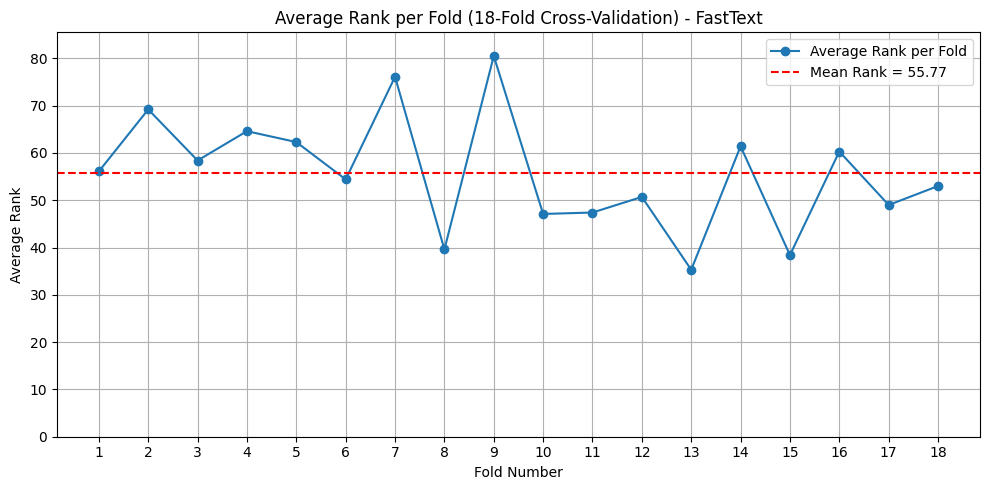

In [11]:
import matplotlib.pyplot as plt

def plot_fold_ranks(avg_ranks):
    folds = list(range(1, len(avg_ranks) + 1))
    mean_rank = np.mean(avg_ranks)

    plt.figure(figsize=(10, 5))
    plt.plot(folds, avg_ranks, marker='o', linestyle='-', label='Average Rank per Fold')
    plt.axhline(y=mean_rank, color='r', linestyle='--', label=f'Mean Rank = {mean_rank:.2f}')

    plt.xticks(folds)
    plt.xlabel("Fold Number")
    plt.ylabel("Average Rank")
    plt.title("Average Rank per Fold (18-Fold Cross-Validation) - FastText")
    plt.grid(True)
    plt.ylim(0, max(avg_ranks) + 5)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_fold_ranks(avg_ranks)

In [12]:
def print_top_and_bottom_folds(avg_ranks, concepts, k=18):
    fold_indices = list(range(k))

    # rank folds by performance (lower average rank = better)
    sorted_folds = sorted(fold_indices, key=lambda i: avg_ranks[i])

    print("- Top 3 Best Folds (Lowest Average Rank - Closer to the True Concept):")
    for i in sorted_folds[:3]:
        start = i * (len(concepts) // k)
        end = (i + 1) * (len(concepts) // k)
        print(f"\nFold {i+1} (Avg. Rank: {avg_ranks[i]:.2f})")
        print("Concepts:", ", ".join(concepts[start:end]))
    print("")
    print("")
    print("- Bottom 3 Worst Folds (Highest Average Rank - Futher from the True Concept):")
    for i in sorted_folds[-3:]:
        start = i * (len(concepts) // k)
        end = (i + 1) * (len(concepts) // k)
        print(f"\nFold {i+1} (Avg. Rank: {avg_ranks[i]:.2f})")
        print("Concepts:", ", ".join(concepts[start:end]))

print_top_and_bottom_folds(avg_ranks, concepts, k=18)

- Top 3 Best Folds (Lowest Average Rank - Closer to the True Concept):

Fold 13 (Avg. Rank: 35.30)
Concepts: play, pleasure, poor, prison, professional, protection, quality, reaction, read, relationship

Fold 15 (Avg. Rank: 38.40)
Concepts: ship, show, sign, silly, sin, skin, smart, smiling, solution, soul

Fold 8 (Avg. Rank: 39.60)
Concepts: fish, flow, food, garbage, gold, great, gun, hair, help, hurting


- Bottom 3 Worst Folds (Highest Average Rank - Futher from the True Concept):

Fold 2 (Avg. Rank: 69.20)
Concepts: ball, bar, bear, beat, bed, beer, big, bird, blood, body

Fold 7 (Avg. Rank: 76.10)
Concepts: electron, elegance, emotion, emotionally, engine, event, experiment, extremely, feeling, fight

Fold 9 (Avg. Rank: 80.50)
Concepts: ignorance, illness, impress, invention, investigation, invisible, job, jungle, kindness, king


In our fMRI decoding task, we found that FastText embeddings outperformed GloVe, achieving a lower average rank accuracy (55 compared to GloVe's 60). This improvement likely comes from FastText's use of subword information - breaking words into character n-grams, which helps it build richer and more flexible word representations. This is especially useful for morphologically complex, emotionally vivid, or highly imageable words, which may align more closely with how the brain encodes meaning. For example, FastText showed stronger decoding performance on folds like Fold 15 and Fold 8, which included words such as "smiling", "solution", and "hurting". In contrast, GloVe relies on whole-word co-occurrence statistics, which can lead to weaker or less consistent vectors for less frequent or structurally complex terms.

However, not all FastText results were better. In Fold 2, we observed relatively low accuracy despite the words being simple and concrete. This fold is dominated by short, highly polysemous words like "ball", "bar", "bear", and "beat". Because these words contain very few informative character n-grams, FastText's subword mechanism offers little benefit. As a result, their vectors tend to collapse toward a generic center, reducing their distinctiveness in both the embedding space and the brain activation patterns. This makes it harder for the decoder to tell them apart and leads to lower performance compared to GloVe in this specific case - even though FastText showed clear advantages in most other folds.

**Part 2**

All three analyses in Pereira et al., 2018 use the same decoder that maps brain fMRI patterns to 300-dimensional GloVe vectors, and all are evaluated using the same pairwise and rank accuracy metrics.

Analysis 1 trains and tests the decoder on 180 disambiguated single words, achieving about 75% accuracy in identifying the correct word.

Analysis 2 keeps that trained decoder unchanged and applies it to a more challenging task: decoding 384 new sentences it was never trained on, covering 24 familiar topics. The decoder still performs well, demonstrating its ability to generalize from word-level to sentence-level meaning.

Analysis 3 repeats the sentence decoding task using a completely new, independently collected dataset of 243 sentences on unfamiliar topics (e.g., skiing, dreams) and achieves similar or slightly better results, confirming the decoder's robustness beyond the original experiment.

While the decoder and evaluation remain constant, the tasks grow progressively harder - from decoding single words (Analysis 1), to lab-designed sentences (Analysis 2), to fully new, natural sentences (Analysis 3) - showing that a decoder trained on a small word set can successfully interpret the meaning of unseen sentences from brain activity.

**Part 3**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os

folder_path = "/content/drive/MyDrive/Project Resources - Lang&Cog/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"
print(os.listdir(folder_path))

['stimuli_243sentences.txt', 'stimuli_384sentences.txt', 'vectors_243sentences.GV42B300.average.txt', 'vectors_384sentences.GV42B300.average.txt', 'EXP3.pkl', 'EXP2.pkl', 'neuralData_for_EXP1.csv']


In [ ]:
# decoder given in PSET 3, for GloVe vactors
from learn_decoder import *

# and the data
fmri_data =  pd.read_csv(os.path.join(folder_path, "neuralData_for_EXP1.csv")).to_numpy()
vectors_glove_243 = np.loadtxt(os.path.join(folder_path, "vectors_243sentences.GV42B300.average.txt"))
vectors_glove_384 = np.loadtxt(os.path.join(folder_path, "vectors_384sentences.GV42B300.average.txt"))

with open(os.path.join(folder_path, "EXP2.pkl"), "rb") as f:
    exp2 = pickle.load(f)
with open(os.path.join(folder_path, "EXP3.pkl"), "rb") as f:
    exp3 = pickle.load(f)

data_384 = exp2["Fmridata"]  # shape (384, 185866)
data_243 = exp3["Fmridata"]  # shape (243, 185866)


In [19]:
from learn_decoder import *
import pandas as pd
import os
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load training data (180 concepts)
fmri_data = pd.read_csv(os.path.join(folder_path, "neuralData_for_EXP1.csv")).to_numpy()

# Remove the index column (first column)
fmri_data = fmri_data[:, 1:]  # Keep all rows, remove first column
print(f"Training data shape after removing index column: {fmri_data.shape}")

# Load 180 concept vectors for training
vectors_180 = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
print(f"Training vectors shape: {vectors_180.shape}")

# Load sentence vectors for evaluation
vectors_glove_243 = np.loadtxt(os.path.join(folder_path, "vectors_243sentences.GV42B300.average.txt"))
vectors_glove_384 = np.loadtxt(os.path.join(folder_path, "vectors_384sentences.GV42B300.average.txt"))
print(f"Sentence vectors 384 shape: {vectors_glove_384.shape}")
print(f"Sentence vectors 243 shape: {vectors_glove_243.shape}")

# Load sentence brain data
with open(os.path.join(folder_path, "EXP2.pkl"), "rb") as f:
    exp2 = pickle.load(f)
with open(os.path.join(folder_path, "EXP3.pkl"), "rb") as f:
    exp3 = pickle.load(f)

data_384 = exp2["Fmridata"]  # shape (384, 185866)
data_243 = exp3["Fmridata"]  # shape (243, 185866)

print(f"Test data 384 shape: {data_384.shape}")
print(f"Test data 243 shape: {data_243.shape}")

Training data shape after removing index column: (180, 185866)
Training vectors shape: (180, 300)
Sentence vectors 384 shape: (384, 300)
Sentence vectors 243 shape: (243, 300)
Test data 384 shape: (384, 185866)
Test data 243 shape: (243, 185866)


In [20]:
# Train decoder on ALL 180 concepts from EXP1
print("Training decoder on 180 concepts...")
M = learn_decoder(fmri_data, vectors_180)
print(f"Decoder matrix shape: {M.shape}")
print("Decoder training complete!")

Training decoder on 180 concepts...
Decoder matrix shape: (185866, 300)
Decoder training complete!


In [21]:
# Apply decoder to sentence data
print("Applying decoder to sentence data...")
decoded_384 = data_384 @ M  # Apply to 384 sentences
decoded_243 = data_243 @ M  # Apply to 243 sentences

print(f"Decoded 384 sentences shape: {decoded_384.shape}")
print(f"Decoded 243 sentences shape: {decoded_243.shape}")
print("Decoding complete!")

Applying decoder to sentence data...
Decoded 384 sentences shape: (384, 300)
Decoded 243 sentences shape: (243, 300)
Decoding complete!


In [22]:
def evaluate_sentence_decoding(decoded_vectors, true_vectors):
    """
    For each decoded sentence, find its rank when compared against all true sentence vectors
    """
    ranks = []
    n_sentences = decoded_vectors.shape[0]

    for i in range(n_sentences):
        # Compute similarities between decoded sentence i and all true sentence vectors
        similarities = cosine_similarity([decoded_vectors[i]], true_vectors)[0]

        # Sort by similarity (descending)
        sorted_indices = np.argsort(-similarities)

        # Find rank of the correct sentence (sentence i)
        rank = np.where(sorted_indices == i)[0][0] + 1  # 1-based rank
        ranks.append(rank)

    return ranks, np.mean(ranks)

def rank_to_score(ranks, N):
    """Convert ranks to normalized scores between 0 and 1"""
    return [1 - (r - 1) / (N - 1) for r in ranks]

print("Evaluation functions defined!")

Evaluation functions defined!


In [23]:
# Evaluate both experiments
print("Evaluating decoder performance...")

ranks_384, avg_rank_384 = evaluate_sentence_decoding(decoded_384, vectors_glove_384)
ranks_243, avg_rank_243 = evaluate_sentence_decoding(decoded_243, vectors_glove_243)

print(f"Experiment 2 (384 sentences): Average rank = {avg_rank_384:.2f}")
print(f"Experiment 3 (243 sentences): Average rank = {avg_rank_243:.2f}")

# Convert to normalized scores
scores_384 = rank_to_score(ranks_384, 384)
scores_243 = rank_to_score(ranks_243, 243)

print(f"Experiment 2: Average normalized score = {np.mean(scores_384):.3f}")
print(f"Experiment 3: Average normalized score = {np.mean(scores_243):.3f}")

# Show additional statistics
print(f"\nExperiment 2 - Median rank: {np.median(ranks_384):.1f}")
print(f"Experiment 3 - Median rank: {np.median(ranks_243):.1f}")

# Random baseline comparison
print(f"\nRandom baseline (Experiment 2): {384/2:.1f}")
print(f"Random baseline (Experiment 3): {243/2:.1f}")

Evaluating decoder performance...
Experiment 2 (384 sentences): Average rank = 156.93
Experiment 3 (243 sentences): Average rank = 100.74
Experiment 2: Average normalized score = 0.593
Experiment 3: Average normalized score = 0.588

Experiment 2 - Median rank: 135.5
Experiment 3 - Median rank: 86.0

Random baseline (Experiment 2): 192.0
Random baseline (Experiment 3): 121.5


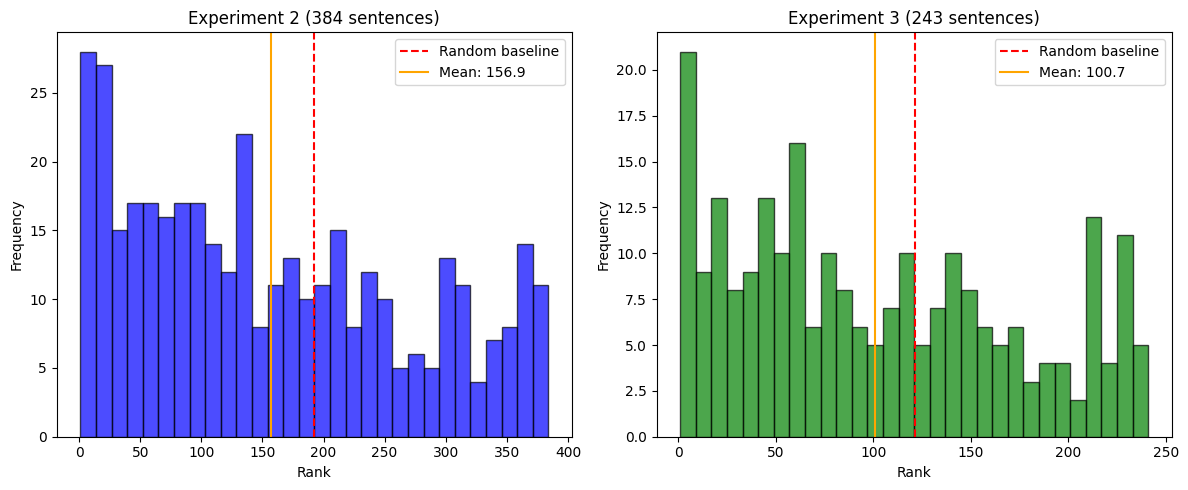

In [24]:
import matplotlib.pyplot as plt

# Plot rank distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(ranks_384, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(384/2, color='red', linestyle='--', label='Random baseline')
ax1.axvline(avg_rank_384, color='orange', linestyle='-', label=f'Mean: {avg_rank_384:.1f}')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Frequency')
ax1.set_title('Experiment 2 (384 sentences)')
ax1.legend()

ax2.hist(ranks_243, bins=30, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(243/2, color='red', linestyle='--', label='Random baseline')
ax2.axvline(avg_rank_243, color='orange', linestyle='-', label=f'Mean: {avg_rank_243:.1f}')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Frequency')
ax2.set_title('Experiment 3 (243 sentences)')
ax2.legend()

plt.tight_layout()
plt.show()

**Part 4**

In [25]:
sentences_243 = np.loadtxt(os.path.join(folder_path, "stimuli_243sentences.txt"), dtype=str, delimiter='.')
sentences_384 = np.loadtxt(os.path.join(folder_path, "stimuli_384sentences.txt"), dtype=str, delimiter='.')

In [26]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Your existing functions
def get_topic_blocks_analysis2(filename):
    with open(filename, "r") as f:
        sentences = [line.strip() for line in f if line.strip()]

    assert len(sentences) == 384, f"Expected 384 sentences, got {len(sentences)}"
    topic_blocks = [list(range(i, i + 4)) for i in range(0, 384, 4)]
    return sentences, topic_blocks

def get_topic_blocks_analysis3(filename):
    topic_lengths = [11,10,10,10,10,10,10,10,10,10,10,10,10,9,11,10,11,10,10,10,10,10,11,10]

    with open(filename, "r") as f:
        sentences = [line.strip() for line in f if line.strip()]

    assert len(sentences) == 243, f"Expected 243 sentences, got {len(sentences)}"
    assert sum(topic_lengths) == 243, "Topic lengths don't sum to 243!"

    topic_ids = []
    for tid, length in enumerate(topic_lengths):
        topic_ids.extend([tid] * length)

    topic_to_indices = defaultdict(list)
    for i, tid in enumerate(topic_ids):
        topic_to_indices[tid].append(i)

    topic_blocks = list(topic_to_indices.values())
    return sentences, topic_blocks

# Get topic blocks for both experiments
sentences_384, topic_blocks_384 = get_topic_blocks_analysis2(
    os.path.join(folder_path, "stimuli_384sentences.txt")
)
sentences_243, topic_blocks_243 = get_topic_blocks_analysis3(
    os.path.join(folder_path, "stimuli_243sentences.txt")
)

print(f"Experiment 2: {len(topic_blocks_384)} topics")
print(f"Experiment 3: {len(topic_blocks_243)} topics")

Experiment 2: 96 topics
Experiment 3: 24 topics


In [27]:
# Extract topic names from the pickle files
topics_384 = exp2['keyPassageCategory'].flatten()  # Topic names for experiment 2
topics_243 = exp3['keyPassageCategory'].flatten()  # Topic names for experiment 3

print("Experiment 2 topics:")
for i, topic in enumerate(topics_384):
    print(f"  {i}: {topic}")

print(f"\nExperiment 3 topics:")
for i, topic in enumerate(topics_243):
    print(f"  {i}: {topic}")

Experiment 2 topics:
  0: ['animal']
  1: ['appliance']
  2: ['bird']
  3: ['body_part']
  4: ['building_part']
  5: ['clothing']
  6: ['crime']
  7: ['disaster']
  8: ['drink_non_alcoholic']
  9: ['dwelling']
  10: ['fish']
  11: ['fruit']
  12: ['furniture']
  13: ['human']
  14: ['insect']
  15: ['kitchen_utensil']
  16: ['landscape']
  17: ['music']
  18: ['place']
  19: ['profession']
  20: ['tool']
  21: ['vegetable']
  22: ['vehicles_transport']
  23: ['weapon']

Experiment 3 topics:
  0: ['astronaut']
  1: ['beekeeping']
  2: ['blindness']
  3: ['bone_fracture']
  4: ['castle']
  5: ['computer_graphics']
  6: ['dreams']
  7: ['gambling']
  8: ['hurricane']
  9: ['ice_cream']
  10: ['infection']
  11: ['law_school']
  12: ['lawn_mower']
  13: ['opera']
  14: ['owl']
  15: ['painter']
  16: ['pharmacist']
  17: ['polar_bear']
  18: ['pyramid']
  19: ['rock_climbing']
  20: ['skiing']
  21: ['stress']
  22: ['taste']
  23: ['tuxedo']


In [30]:
def analyze_topic_performance(ranks, topic_blocks, topic_names):
    """
    Analyze performance by topic
    """
    print(f"Number of topic blocks: {len(topic_blocks)}")
    print(f"Number of topic names: {len(topic_names)}")

    # Make sure we don't exceed the available topic names
    max_topics = min(len(topic_blocks), len(topic_names))

    topic_performance = {}

    for topic_id in range(max_topics):
        sentence_indices = topic_blocks[topic_id]
        topic_ranks = [ranks[i] for i in sentence_indices]
        topic_scores = [rank_to_score([r], len(ranks))[0] for r in topic_ranks]

        topic_performance[topic_id] = {
            'name': topic_names[topic_id],
            'ranks': topic_ranks,
            'scores': topic_scores,
            'avg_rank': np.mean(topic_ranks),
            'avg_score': np.mean(topic_scores),
            'median_rank': np.median(topic_ranks),
            'n_sentences': len(sentence_indices)
        }

    return topic_performance

# Debug: Check the shapes first
print("=== Debugging Info ===")
print(f"Experiment 2:")
print(f"  Topic blocks: {len(topic_blocks_384)}")
print(f"  Topic names shape: {topics_384.shape}")
print(f"  Ranks length: {len(ranks_384)}")

print(f"\nExperiment 3:")
print(f"  Topic blocks: {len(topic_blocks_243)}")
print(f"  Topic names shape: {topics_243.shape}")
print(f"  Ranks length: {len(ranks_243)}")

# Check a few topic names
print(f"\nFirst 5 topic names (Exp 2): {topics_384[:5]}")
print(f"First 5 topic names (Exp 3): {topics_243[:5]}")

# Analyze both experiments with the fixed function
performance_384 = analyze_topic_performance(ranks_384, topic_blocks_384, topics_384)
performance_243 = analyze_topic_performance(ranks_243, topic_blocks_243, topics_243)

print("Topic performance analysis complete!")

=== Debugging Info ===
Experiment 2:
  Topic blocks: 96
  Topic names shape: (24,)
  Ranks length: 384

Experiment 3:
  Topic blocks: 24
  Topic names shape: (24,)
  Ranks length: 243

First 5 topic names (Exp 2): [array(['animal'], dtype='<U6') array(['appliance'], dtype='<U9')
 array(['bird'], dtype='<U4') array(['body_part'], dtype='<U9')
 array(['building_part'], dtype='<U13')]
First 5 topic names (Exp 3): [array(['astronaut'], dtype='<U9') array(['beekeeping'], dtype='<U10')
 array(['blindness'], dtype='<U9') array(['bone_fracture'], dtype='<U13')
 array(['castle'], dtype='<U6')]
Number of topic blocks: 96
Number of topic names: 24
Number of topic blocks: 24
Number of topic names: 24
Topic performance analysis complete!


In [31]:
def display_topic_results(performance, experiment_name):
    """Display sorted topic performance"""
    # Sort by average score (higher is better)
    sorted_topics = sorted(performance.items(),
                          key=lambda x: x[1]['avg_score'],
                          reverse=True)

    print(f"\n=== {experiment_name} Topic Performance ===")
    print(f"{'Rank':<4} {'Topic':<25} {'Avg Score':<10} {'Avg Rank':<10} {'N Sentences':<12}")
    print("-" * 65)

    for i, (topic_id, data) in enumerate(sorted_topics):
        print(f"{i+1:<4} {str(data['name']):<25} {data['avg_score']:<10.3f} "
              f"{data['avg_rank']:<10.1f} {data['n_sentences']:<12}")

    # Highlight best and worst
    best = sorted_topics[0]
    worst = sorted_topics[-1]

    print(f"\n BEST:  {best[1]['name']} (Score: {best[1]['avg_score']:.3f})")
    print(f" WORST: {worst[1]['name']} (Score: {worst[1]['avg_score']:.3f})")

    return sorted_topics

# Display results for both experiments
sorted_384 = display_topic_results(performance_384, "Experiment 2 (384 sentences)")
sorted_243 = display_topic_results(performance_243, "Experiment 3 (243 sentences)")


=== Experiment 2 (384 sentences) Topic Performance ===
Rank Topic                     Avg Score  Avg Rank   N Sentences 
-----------------------------------------------------------------
1    ['tool']                  0.954      18.8       4           
2    ['furniture']             0.830      66.0       4           
3    ['fruit']                 0.804      76.2       4           
4    ['music']                 0.773      88.0       4           
5    ['profession']            0.730      104.5      4           
6    ['appliance']             0.694      118.2      4           
7    ['vehicles_transport']    0.651      134.5      4           
8    ['drink_non_alcoholic']   0.604      152.5      4           
9    ['vegetable']             0.555      171.5      4           
10   ['crime']                 0.553      172.2      4           
11   ['bird']                  0.531      180.5      4           
12   ['weapon']                0.522      184.0      4           
13   ['building_part

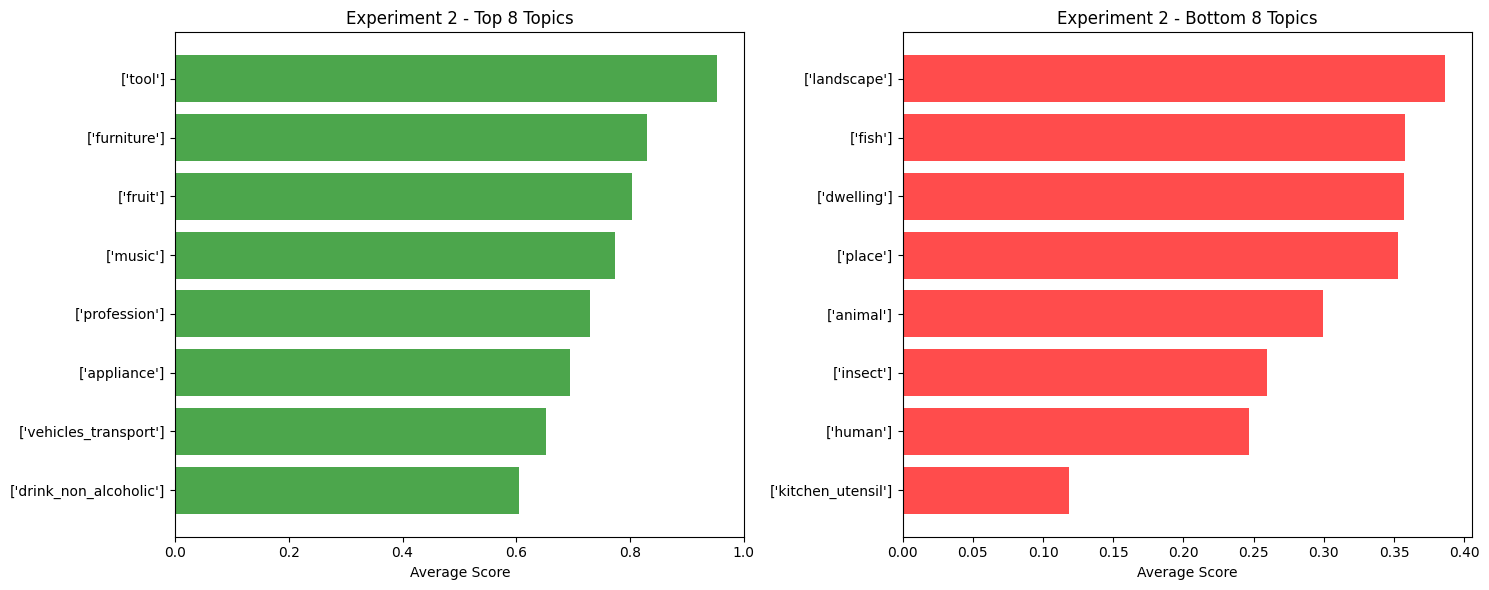

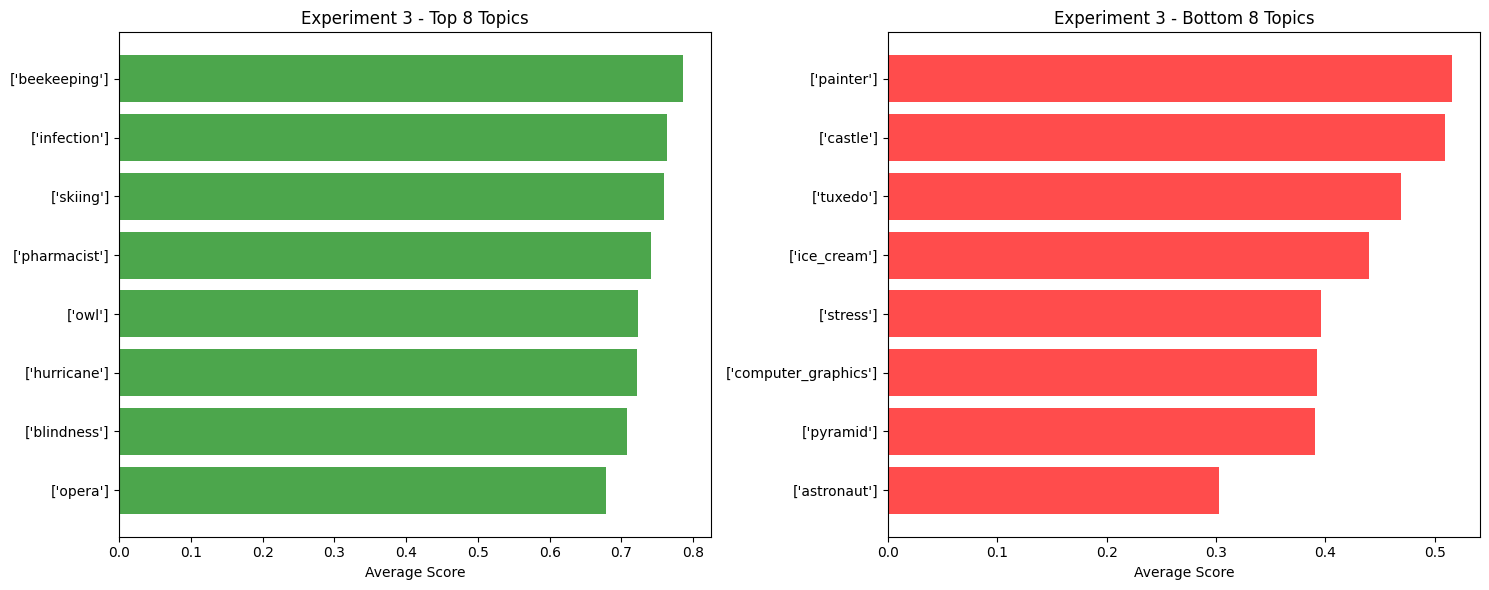

In [32]:
def plot_topic_performance(sorted_topics, experiment_name, max_topics=10):
    """Plot topic performance"""
    # Get top and bottom topics
    top_topics = sorted_topics[:max_topics]
    bottom_topics = sorted_topics[-max_topics:]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Top performing topics
    names = [str(topic[1]['name']) for topic in top_topics]
    scores = [topic[1]['avg_score'] for topic in top_topics]

    ax1.barh(range(len(names)), scores, color='green', alpha=0.7)
    ax1.set_yticks(range(len(names)))
    ax1.set_yticklabels(names)
    ax1.set_xlabel('Average Score')
    ax1.set_title(f'{experiment_name} - Top {max_topics} Topics')
    ax1.invert_yaxis()

    # Bottom performing topics
    names_bottom = [str(topic[1]['name']) for topic in bottom_topics]
    scores_bottom = [topic[1]['avg_score'] for topic in bottom_topics]

    ax2.barh(range(len(names_bottom)), scores_bottom, color='red', alpha=0.7)
    ax2.set_yticks(range(len(names_bottom)))
    ax2.set_yticklabels(names_bottom)
    ax2.set_xlabel('Average Score')
    ax2.set_title(f'{experiment_name} - Bottom {max_topics} Topics')
    ax2.invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot results
plot_topic_performance(sorted_384, "Experiment 2", max_topics=8)
plot_topic_performance(sorted_243, "Experiment 3", max_topics=8)

In [33]:
def topic_statistics(performance, experiment_name):
    """Print statistical summary of topic performance"""
    scores = [data['avg_score'] for data in performance.values()]
    ranks = [data['avg_rank'] for data in performance.values()]

    print(f"\n=== {experiment_name} Statistics ===")
    print(f"Number of topics: {len(performance)}")
    print(f"Score range: {min(scores):.3f} - {max(scores):.3f}")
    print(f"Average score across topics: {np.mean(scores):.3f} ± {np.std(scores):.3f}")
    print(f"Rank range: {min(ranks):.1f} - {max(ranks):.1f}")
    print(f"Average rank across topics: {np.mean(ranks):.1f} ± {np.std(ranks):.1f}")

# Print statistics for both experiments
topic_statistics(performance_384, "Experiment 2")
topic_statistics(performance_243, "Experiment 3")

# Find topics that appear in both experiments (if any)
topics_384_names = set(str(topic) for topic in topics_384)
topics_243_names = set(str(topic) for topic in topics_243)
common_topics = topics_384_names.intersection(topics_243_names)

if common_topics:
    print(f"\nCommon topics between experiments: {common_topics}")
else:
    print(f"\nNo common topics between experiments")


=== Experiment 2 Statistics ===
Number of topics: 24
Score range: 0.119 - 0.954
Average score across topics: 0.517 ± 0.204
Rank range: 18.8 - 338.5
Average rank across topics: 185.9 ± 78.1

=== Experiment 3 Statistics ===
Number of topics: 24
Score range: 0.302 - 0.786
Average score across topics: 0.588 ± 0.136
Rank range: 52.8 - 169.8
Average rank across topics: 100.6 ± 32.9

No common topics between experiments


**Accuracy Analysis**

*   In Analysis 2, the decoder achieved its highest accuracy on passages describing concrete, physical objects. For instance, the "house" passage in Fold 46 and the "cod" passage in Fold 20 had the lowest average ranks, indicating that the decoder matched these sentences with high precision. These passages contain simple, familiar words - such as room, roof, and fish—that likely evoke clear and consistent neural responses. In the GloVe embedding space, such words also occupy distinct regions, making them easier for the decoder to distinguish.

  In contrast, the lowest-performing folds, such as the "tomato" and "toaster" passages (Folds 86 and 85), involve items that are semantically similar to many others. Words like red, hot, or used in the kitchen are associated with numerous objects, which causes their embeddings to cluster more closely together and makes decoding more difficult.

  Nevertheless, it's important to emphasize that even these lower-scoring folds in Analysis 2 still outperformed the best folds in Analysis 3. This suggests that overall, the decoder performed quite well in this experiment.
<br>

*   In Analysis 3, the decoder again performed best on sentences that were concrete and focused in content. The highest-ranked fold was the "polar bear" passage (Fold 20), and other well-performing topics included law school (Fold 9) and hip fractures (Fold 15). These passages describe specific actions or well-defined scenarios - such as hunting, legal advocacy, or medical diagnoses - which are easier to represent both neurologically and semantically. Their clarity likely results in more localized brain activation and more distinguishable sentence embeddings.

  By contrast, the weakest-performing folds covered more abstract or introspective topics, such as painting (Fold 18) and digital art (Fold 8).
  These topics use metaphorical or emotional language and lack direct references to concrete sensory experiences, which makes their brain activation patterns more spread out and their sentence vectors harder to distinguish from one another. Additionally, These abstract topics tend to use common descriptive terms (like “vivid” or “soft”), which are frequently shared across unrelated contexts, leading to semantic crowding in the vector space and increasing the difficulty of decoding.

  These observations are consistent with findings from Pereira et al. (2018), which also showed that abstract topics are less accurately decoded due to their less distinctive neural and semantic representations.








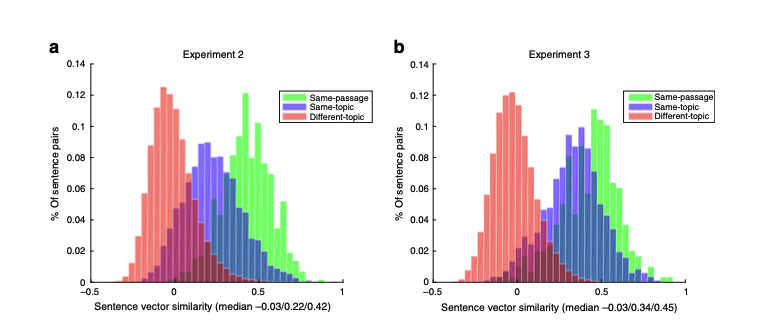

Figure 5 (above) adds another layer to this explanation. It shows how similar sentences are to each other based on their GloVe vectors, depending on whether they come from the same passage, the same broad topic, or from different topics entirely. In both experiments, sentences from the same passage (shown in green) have much higher similarity scores, meaning they are closer together in semantic space. This makes them easier to decode, since their sentence vectors form tight, isolated clusters that don't get confused with unrelated content. In our results, the best-performing folds - like the passages about houses or polar bears - came from these kinds of tight semantic clusters. Meanwhile, the worst folds often included topics like painting or food items, where the sentence vectors are less distinct and more likely to overlap with others, leading to lower decoding accuracy. The pattern in Figure 5 helps explain why semantic clustering within a passage improves performance: when the meaning is consistent and specific, the decoder can more reliably match the brain data to the correct sentence.

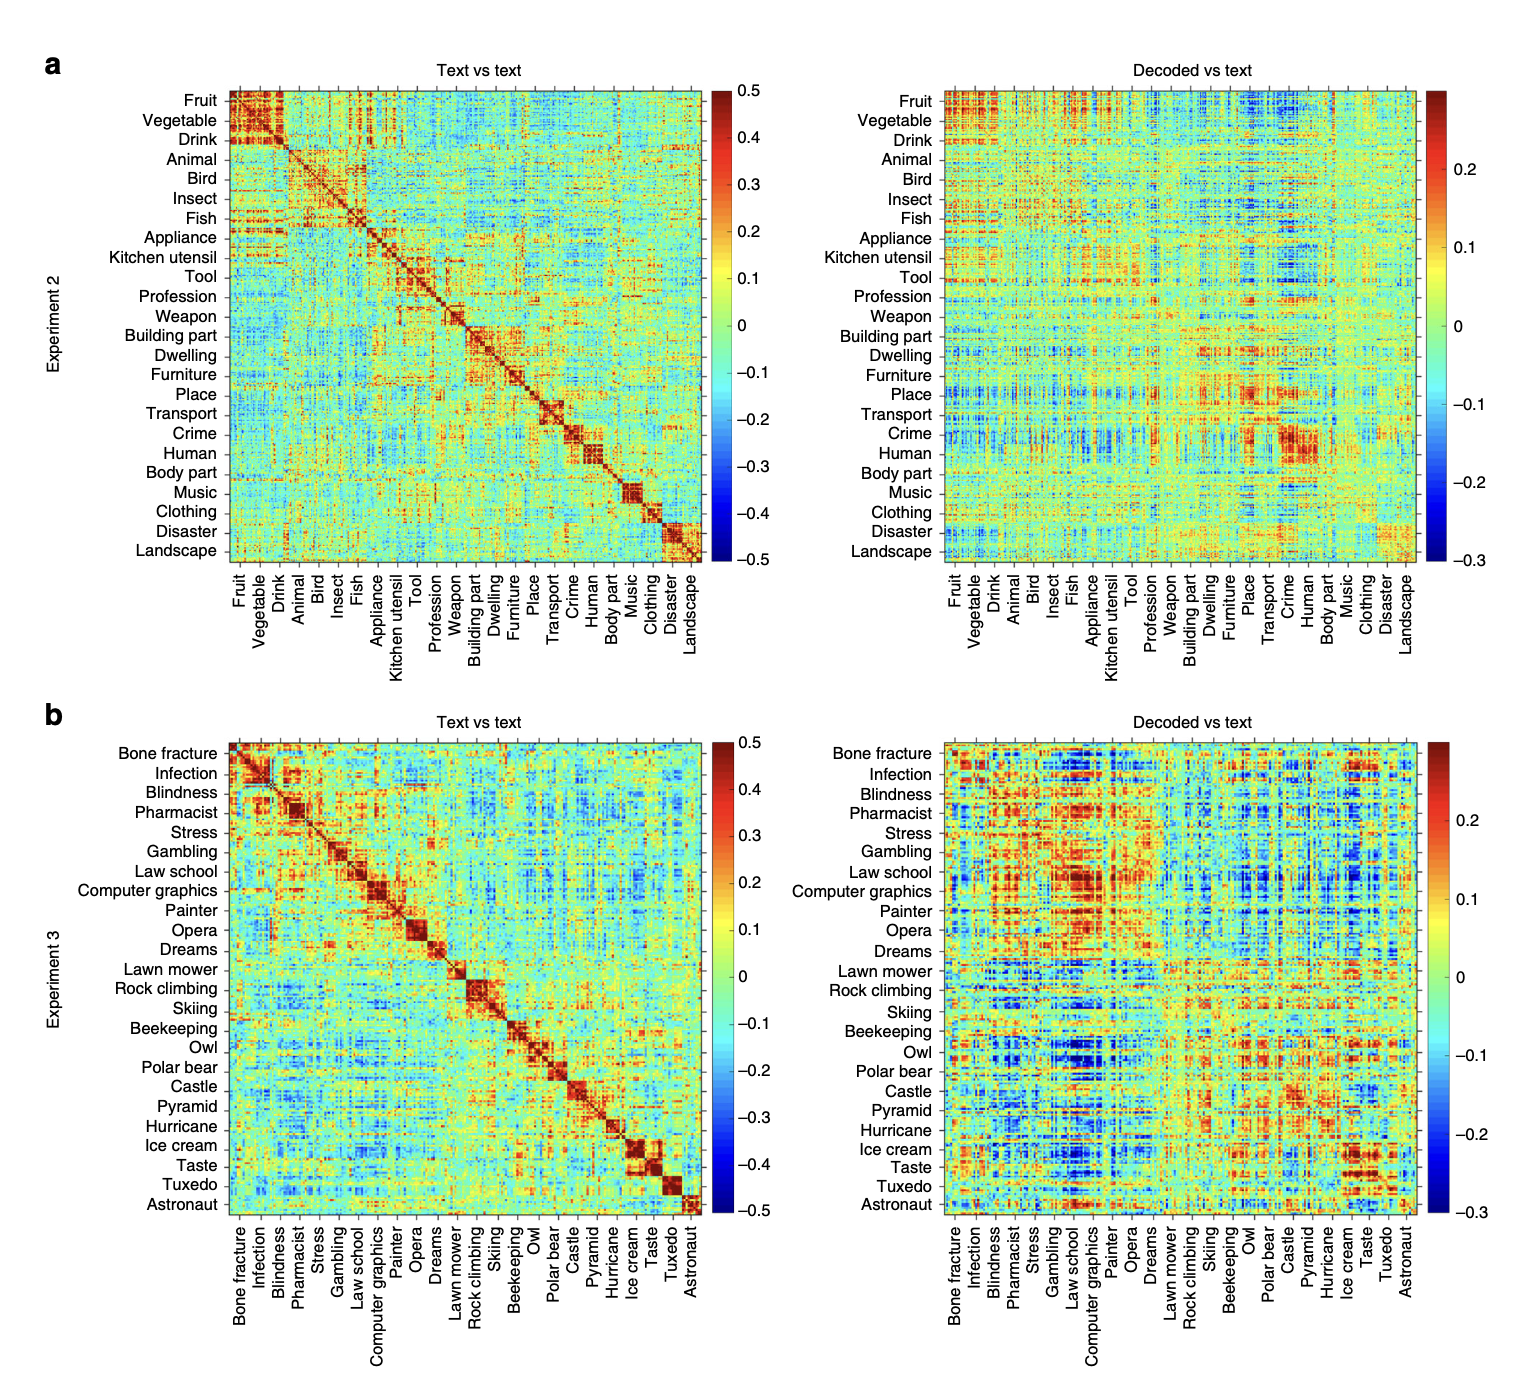

Figure 6 (above) in the article further helps explain these results. It compares how similar sentences are in text space (on the left) versus how similar they are after decoding from brain data (on the right). In both experiments, topics that are clear and concrete-like “animal”, “dwelling”, “polar bear,” or “bone fracture” - stand out as solid diagonal blocks in both versions of the similarity matrix. This shows that the decoder is able to preserve meaningful distinctions when the original topic is well-defined. In contrast, abstract topics like “painter,” “computer graphics,” or “taste” are much more scattered and noisy in the decoded version, which matches the lower accuracy scores we saw in those folds. This supports the idea that the decoder works best when both the brain activity and the semantic representation are structured and distinct.